# Week3 - Homework

Write a rule based predictor for the dataset below. 

Choose one of the following datasets and do your EDA. 
Test your assumptions. 

Finally write your code in `predict_one` function. 

Do __NOT__ change the function signature! This function should only take name and return `F` or `M`

In [123]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# us_names = 'https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/names/us_names.csv'
in_names = 'https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/names/in_names.csv'


df = pd.read_csv(in_names)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    6000 non-null   object
 1   gender  6000 non-null   object
dtypes: object(2)
memory usage: 140.6+ KB


In [124]:
df.to_csv("Indian_names.csv")

In [125]:
df.gender.value_counts()

M    3000
F    3000
Name: gender, dtype: int64

### Two examples:

In [126]:
df['is_last_letter_vowel'] = [ 'aeiou'.find(name[-1])>0 for name in df.name]

In [127]:
df

,name,gender,is_last_letter_vowel
0,rafal,M,False
1,premwati,F,True
2,sangeet,F,False
3,reemi,F,True
4,vijayta,F,False
...,...,...,...
5995,naeem,M,False
5996,aesha,F,False
5997,chinu,M,True
5998,shimran,F,False


<AxesSubplot:xlabel='is_last_letter_vowel', ylabel='count'>

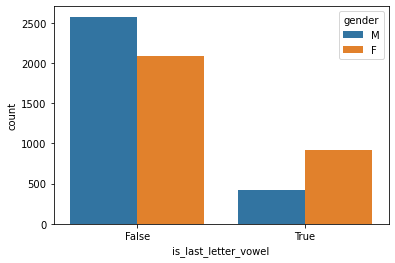

In [128]:
import seaborn as sns

sns.countplot(data = df, x = 'is_last_letter_vowel', hue = 'gender')

It looks like last letter is being a vowel is not a good indicator for this dataset!

<AxesSubplot:xlabel='len', ylabel='count'>

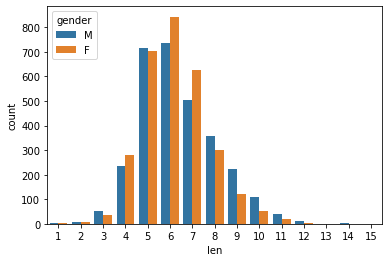

In [129]:
df['len'] = [ len(name) for name in df.name]
sns.countplot(data = df, x = 'len', hue = 'gender')

Seems like length doesn't also seem like a good separator

<AxesSubplot:xlabel='vowel_count', ylabel='count'>

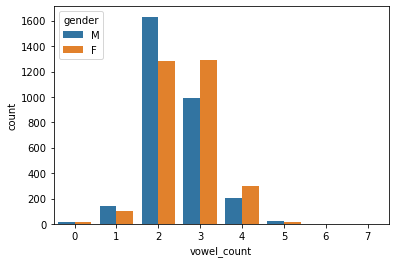

In [130]:
# tried with vowelcount in a name  but unable to get good separator
import pandas as pd
def count_vowels(s):
    return sum(1 for char in s if char.lower() in 'aeiou')
df['vowel_count'] = df['name'].apply(count_vowels)
sns.countplot(data = df, x = 'vowel_count', hue = 'gender')


<AxesSubplot:xlabel='First_Letter', ylabel='count'>

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2330 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2309 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 2330 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 2309 missing from current font.
  font.set_text(s, 0, flags=flags)


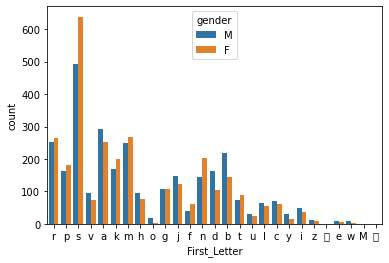

In [131]:
# tried with first_letter occurences  in a name  but unable to get good separator
df['First_Letter'] = [ name[0] for name in df.name]
sns.countplot(data = df, x = 'First_Letter', hue = 'gender')

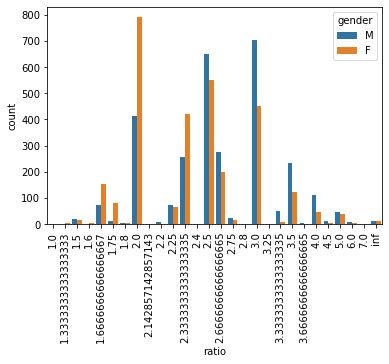

In [132]:
# Tried a ratio for above 2 cases but still unable to find a good separator
df["ratio"] = df["len"]/df["vowel_count"]
import matplotlib.pyplot as plt
sns.countplot(data = df, x = 'ratio', hue = 'gender')
plt.xticks(rotation=90)
plt.show()

In [133]:
#lets delete above columns as we don't get desired output
df = df.drop(columns=["len","vowel_count","ratio","First_Letter","is_last_letter_vowel"])
df

,name,gender
0,rafal,M
1,premwati,F
2,sangeet,F
3,reemi,F
4,vijayta,F
...,...,...
5995,naeem,M
5996,aesha,F
5997,chinu,M
5998,shimran,F


<AxesSubplot:xlabel='last_letter', ylabel='count'>

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2351 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 2344 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 2351 missing from current font.
  font.set_text(s, 0, flags=flags)


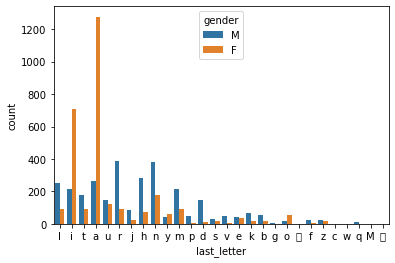

In [134]:
df["last_letter"] = [name[-1] for name in df.name]
sns.countplot(data = df, x = 'last_letter', hue = 'gender')

          name gender last_letter  is_last_letter_aeiouy
0        rafal      M           l                      0
1     premwati      F           i                      1
2      sangeet      F           t                      0
3        reemi      F           i                      1
4      vijayta      F           a                      1
...        ...    ...         ...                    ...
5995     naeem      M           m                      0
5996     aesha      F           a                      1
5997     chinu      M           u                      1
5998   shimran      F           n                      0
5999     bisto      M           o                      1

[6000 rows x 4 columns]


<AxesSubplot:xlabel='is_last_letter_aeiouy', ylabel='count'>

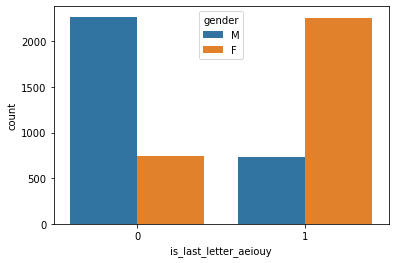

In [135]:
# function is_male checks the last letter of name if its in "aeiou" returns 1 else 0
def is_male(name):
    if name[-1] in "aeiouy":
        return 1
    else:
        return 0
df['is_last_letter_aeiouy'] = df['name'].apply(is_male)
print(df)
sns.countplot(data = df, x = 'is_last_letter_aeiouy', hue = 'gender')
# here we can say that names end with"aeiouy" is a good indicator from below graph

          name gender last_letter  is_last_letter_aeiouy  \
0        rafal      M           l                      0   
1     premwati      F           i                      1   
2      sangeet      F           t                      0   
3        reemi      F           i                      1   
4      vijayta      F           a                      1   
...        ...    ...         ...                    ...   
5995     naeem      M           m                      0   
5996     aesha      F           a                      1   
5997     chinu      M           u                      1   
5998   shimran      F           n                      0   
5999     bisto      M           o                      1   

      is_last_letter_in_ltrjhnmdsvkbfzqpg  
0                                       1  
1                                       0  
2                                       1  
3                                       0  
4                                       0  
...            

<AxesSubplot:xlabel='is_last_letter_in_ltrjhnmdsvkbfzqpg', ylabel='count'>

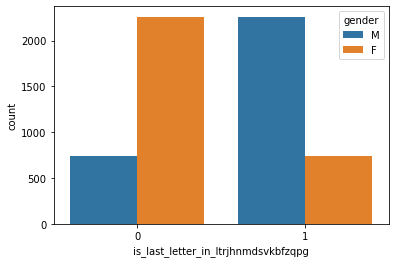

In [136]:
# function is_male checks the last letter of name if its in "aeiou" returns 1 else 0
def is_male(name):
    if name[-1] in "ltrjhnmdsvkbfzqpg":
        return 1
    else:
        return 0
df['is_last_letter_in_ltrjhnmdsvkbfzqpg'] = df['name'].apply(is_male)
print(df)
sns.countplot(data = df, x = 'is_last_letter_in_ltrjhnmdsvkbfzqpg', hue = 'gender')
# here we can say that names end with "ltrjhnmdsvkbfzqpg" is also a good indicator from below graph

lets try to check the above both cases and find highest accuracy

In [137]:
#lets drop those above columns
df = df.drop(columns=["last_letter","is_last_letter_aeiouy","is_last_letter_in_ltrjhnmdsvkbfzqpg"])
df

,name,gender
0,rafal,M
1,premwati,F
2,sangeet,F
3,reemi,F
4,vijayta,F
...,...,...
5995,naeem,M
5996,aesha,F
5997,chinu,M
5998,shimran,F


In [138]:
def predict_one(name):
    if name[-1] in "aeiouy":
        return "F"
    else:
        return "M"
predictions = [predict_one(name) for name in df.name]
accuracy = sum(df.gender == predictions) / len(df)
print(f"Accuracy: {accuracy}")

Accuracy: 0.754


In [139]:
def predict_one(name):
    if name[-1] in "ltrjhnmdsvkbfzqpg":
        return "M"
    else:
        return "F"
predictions = [predict_one(name) for name in df.name]
accuracy = sum(df.gender == predictions) / len(df)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7533333333333333


Both of them are approximately same accuracy so lets filter the other alphabets  and find the occurences.

<AxesSubplot:xlabel='is_last_letter_in_ltrjhnmdsvkbfzqpgaeiouy', ylabel='count'>

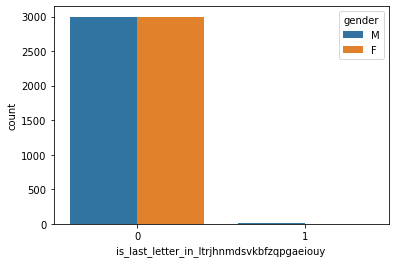

In [140]:
def is_male(name):
    if name[-1] in "ltrjhnmdsvkbfzqpgaeiouy":
        return 0
    else:
        return 1
df['is_last_letter_in_ltrjhnmdsvkbfzqpgaeiouy'] = df['name'].apply(is_male)
sns.countplot(data = df, x = 'is_last_letter_in_ltrjhnmdsvkbfzqpgaeiouy', hue = 'gender')
# by using this plot both of them have same ratio lets check in different way

         name gender  is_last_letter_in_ltrjhnmdsvkbfzqpgaeiouy last_letter
226       चमन      M                                          1           न
526        lc      F                                          1           c
782    rishaw      M                                          1           w
2498   patric      M                                          1           c
4501        M      M                                          1           M
5373      अजय      M                                          1           य
5592  majunew      M                                          1           w
5802   cosmic      F                                          1           c


<ipython-input-141-6b48444cbd7c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fiter_in_names_["last_letter"] = [name[-1]  for name in fiter_in_names_.name ]


<AxesSubplot:xlabel='last_letter', ylabel='count'>

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2351 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 2344 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 2351 missing from current font.
  font.set_text(s, 0, flags=flags)


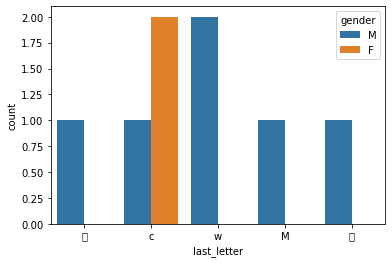

In [141]:
fiter_in_names_ = df[df["is_last_letter_in_ltrjhnmdsvkbfzqpgaeiouy"] == 1]
fiter_in_names_
fiter_in_names_["last_letter"] = [name[-1]  for name in fiter_in_names_.name ]
print(fiter_in_names_)
sns.countplot(data = fiter_in_names_, x = 'last_letter', hue = 'gender')

here we can observe we dont have more than  count == 2 so  75% accuracy  is what i was able to achieve

In [142]:
def predict_one(name):
    if name[-1] in "aeiouy":
        return "F"
    else:
        return "M"
predictions = [predict_one(name) for name in df.name]
accuracy = sum(df.gender == predictions) / len(df)
print(f"Accuracy: {accuracy}")

############################### or #############################

def predict_one(name):
    if name[-1] in "ltrjhnmdsvkbfzqpg":
        return "M"
    else:
        return "F"
predictions = [predict_one(name) for name in df.name]
accuracy = sum(df.gender == predictions) / len(df)
print(f"Accuracy: {accuracy}")

Accuracy: 0.754
Accuracy: 0.7533333333333333
